# **CNN**

In [17]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
# importing the data set of the minist
from keras.datasets import mnist

In [4]:
# Calling the data set
(x_train, y_train), (x_test, y_test) = mnist.load_data()  # we have loded the data

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


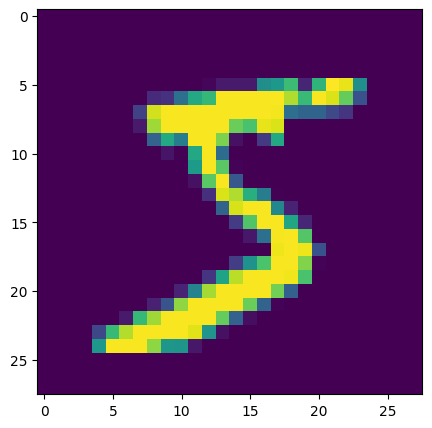

5


In [12]:
# checking the image in the data set
plt.figure(figsize=(5,5))
plt.imshow(x_train[0])
plt.show()
print(y_train[0]) # checking the index no of the digit

In [13]:
# checking the shape of the data set
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [14]:
#normalising the data
x_train = x_train/255
x_test = x_test/255

In [18]:
# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [19]:
# importing the libraries for the CNN
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D,Flatten,Dense

In [20]:
# creating the cnn model for the data
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 output classes
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# adding the compiling functions
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [22]:
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 47s 119ms/step - accuracy: 0.7708 - loss: 0.7280 - val_accuracy: 0.9750 - val_loss: 0.0859
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 80s 113ms/step - accuracy: 0.9637 - loss: 0.1204 - val_accuracy: 0.9823 - val_loss: 0.0608
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 47s 125ms/step - accuracy: 0.9738 - loss: 0.0859 - val_accuracy: 0.9865 - val_loss: 0.0474
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 79s 117ms/step - accuracy: 0.9807 - loss: 0.0688 - val_accuracy: 0.9881 - val_loss: 0.0443
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 80s 112ms/step - accuracy: 0.9818 - loss: 0.0601 - val_accuracy: 0.9887 - val_loss: 0.0438
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 113ms/step - accuracy: 0.9854 - loss: 0.0481 - val_accuracy: 0.9890 - val_loss: 0.0385
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 112ms/step - accuracy: 0.9870 - loss: 0.0425 - val_accuracy: 0.9889 - val_loss: 0.0419
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 84s 117ms/step - accuracy: 0.9891 - loss: 0

In [23]:
# evaluating the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9867 - loss: 0.0364
Test Accuracy: 0.9900


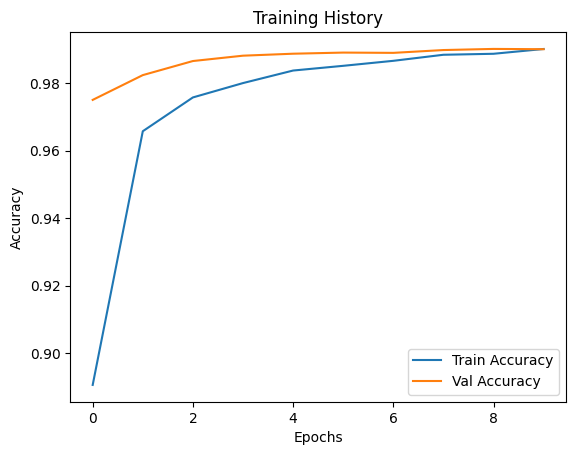

In [24]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training History')
plt.show()
